<a href="https://colab.research.google.com/github/sadiqa682/DL-Assignments/blob/main/Assignment4lonoSphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from google.colab import files
uploaded = files.upload()

Saving ionosphere_data.csv to ionosphere_data.csv


In [9]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import  to_categorical
from sklearn.preprocessing import scale, LabelEncoder

In [10]:
# Loding Dataset
df = pd.read_csv("ionosphere_data.csv")

In [11]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [13]:
df.shape

(351, 35)

In [17]:
# Visualizing The Data
#plt.figure(figsize=(20,8))

#plt.subplot(1,2,1)
#plt.title('Label Distribution Plot')
#sns.distplot(df.label)

In [18]:
# Checking For Null Values
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

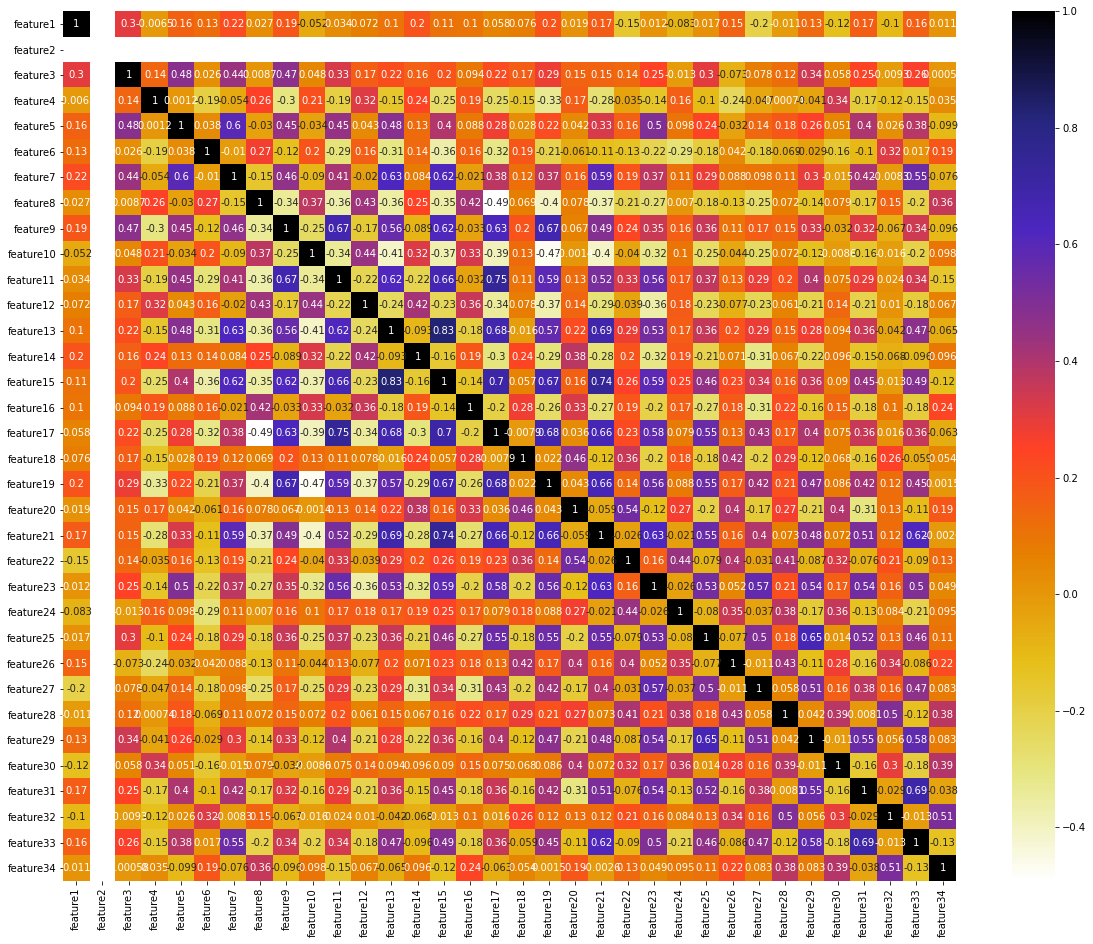

In [19]:
# Making A HeatMap of Correlations
correlations = df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(correlations, cmap="CMRmap_r", annot = True)
plt.show()

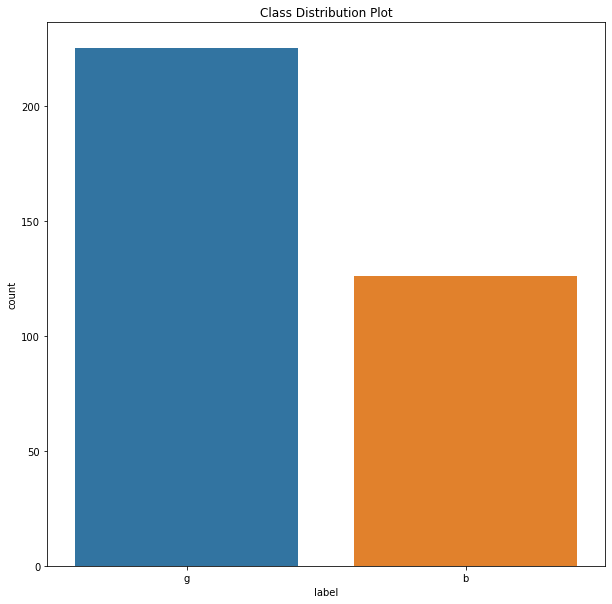

In [20]:
# Class Distribution Plot
plt.figure(figsize=(10,10))
plt.title("Class Distribution Plot")
sns.countplot(x='label', data=df)

# The Dataset Is Imbalance But It's Not Too Much So, I Am Going To Ignore It.

In [21]:
# Droping Unecessary Columns
df = df.drop('feature2', axis=1)

In [22]:
# One Hot Enconding Labels
encoding = {'g': 1, 'b': 0}
df.label.replace(encoding, inplace=True)

In [23]:
# Shuffling Data
df = df.sample(frac = 1)
df

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
28,1,1.00000,0.08380,1.00000,0.17387,1.00000,-0.13308,0.98172,0.64520,1.00000,0.47904,1.00000,0.59113,1.00000,0.70758,1.00000,0.82777,1.00000,0.95099,1.00000,1.00000,0.98042,1.00000,0.91624,1.00000,0.83899,1.00000,0.74822,1.00000,0.64358,1.00000,0.52479,1.00000,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
279,1,0.97905,0.15810,0.90112,0.35237,0.82039,0.48561,0.71760,0.64888,0.58827,0.73743,0.40349,0.83156,0.25140,0.84804,0.04700,0.85475,-0.12193,0.79749,-0.26180,0.80754,-0.37835,0.71676,-0.51034,0.58324,-0.57587,0.46040,-0.61899,0.30796,-0.65754,0.18345,-0.64134,0.02968,1
146,1,-0.65625,0.15625,0.06250,0.00000,0.00000,0.06250,0.62500,0.06250,0.18750,0.00000,-0.03125,0.09375,0.06250,0.00000,0.15625,-0.15625,0.43750,-0.37500,0.00000,-0.09375,0.00000,0.00000,0.03125,-0.46875,0.03125,0.00000,-0.71875,0.03125,-0.03125,0.00000,0.00000,0.09375,0
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1,1.00000,0.67784,0.81309,0.82021,0.43019,1.00000,0.20619,0.80541,-0.43872,1.00000,-0.79135,0.77092,-1.00000,0.40268,-0.39046,-0.58634,-0.97907,-0.42822,-0.73083,-0.76339,-0.37671,-0.97491,0.41366,-1.00000,0.41778,-0.93296,0.25773,-1.00000,0.93570,-0.35222,0.98816,0.03446,1
257,1,0.74449,-0.02390,0.70772,0.03309,0.72243,0.16912,0.79228,0.07721,0.81434,0.43934,0.63787,0.00551,0.70772,0.21691,1.00000,0.06066,0.61029,0.05147,0.67463,0.04228,0.52022,-0.25000,0.72978,-0.15809,0.61727,0.07124,0.30882,0.08640,0.55916,0.07458,0.60294,0.21691,1
186,1,1.00000,1.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,0.00000,0.00000,0
323,1,0.39394,-0.24242,0.62655,0.01270,0.45455,0.09091,0.63636,0.09091,0.21212,-0.21212,0.57576,0.15152,0.39394,0.00000,0.56156,0.04561,0.51515,0.03030,0.78788,0.18182,0.30303,-0.15152,0.48526,0.05929,0.46362,0.06142,0.33333,-0.03030,0.41856,0.06410,0.39394,0.24242,1


In [24]:
# Splitting The Dataset Into Training And Testing Data

# Training Data
train_data = df.iloc[:211,:]
train_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
28,1,1.00000,0.08380,1.00000,0.17387,1.00000,-0.13308,0.98172,0.64520,1.00000,0.47904,1.00000,0.59113,1.00000,0.70758,1.00000,0.82777,1.00000,0.95099,1.00000,1.00000,0.98042,1.00000,0.91624,1.00000,0.83899,1.00000,0.74822,1.00000,0.64358,1.00000,0.52479,1.00000,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
279,1,0.97905,0.15810,0.90112,0.35237,0.82039,0.48561,0.71760,0.64888,0.58827,0.73743,0.40349,0.83156,0.25140,0.84804,0.04700,0.85475,-0.12193,0.79749,-0.26180,0.80754,-0.37835,0.71676,-0.51034,0.58324,-0.57587,0.46040,-0.61899,0.30796,-0.65754,0.18345,-0.64134,0.02968,1
146,1,-0.65625,0.15625,0.06250,0.00000,0.00000,0.06250,0.62500,0.06250,0.18750,0.00000,-0.03125,0.09375,0.06250,0.00000,0.15625,-0.15625,0.43750,-0.37500,0.00000,-0.09375,0.00000,0.00000,0.03125,-0.46875,0.03125,0.00000,-0.71875,0.03125,-0.03125,0.00000,0.00000,0.09375,0
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,1.00000,0.16801,0.99352,0.16334,0.94616,0.33347,0.91759,0.22610,0.91408,0.37107,0.84250,0.46899,0.81011,0.49225,0.78473,0.48311,0.65091,0.56977,0.56553,0.58071,0.55586,0.64720,0.48311,0.55236,0.43317,0.69129,0.35684,0.76147,0.33921,0.66844,0.22101,0.78685,1
305,1,0.52542,-0.03390,0.94915,0.08475,0.52542,-0.16949,0.30508,-0.01695,0.50847,-0.13559,0.64407,0.28814,0.83051,-0.35593,0.54237,0.01695,0.55932,0.03390,0.59322,0.30508,0.86441,0.05085,0.40678,0.15254,0.67287,-0.00266,0.66102,-0.03390,0.83051,-0.15254,0.76271,-0.10169,1
286,1,0.83609,0.13215,0.72171,0.06059,0.65829,0.08315,0.23888,0.12961,0.43837,0.20330,0.49418,0.12686,0.44747,0.13507,0.29352,0.02922,0.48158,0.15756,0.32835,0.14616,0.29495,0.14638,0.26436,0.14530,0.23641,0.14314,0.26429,0.16137,0.18767,0.13632,0.16655,0.13198,1
88,1,0.57647,-0.01569,0.40392,0.00000,0.38431,0.12941,0.40000,-0.05882,0.56471,0.14118,0.46667,0.08235,0.52549,-0.05490,0.58039,0.01569,0.50196,0.00000,0.45882,0.06667,0.58039,0.08235,0.49804,0.00392,0.48601,0.10039,0.46275,0.08235,0.45098,0.23529,0.43137,0.17255,1


In [25]:
# Testing Data
test_data = df.iloc[211:,:]
test_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
77,0,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,0
333,1,0.97513,0.00710,0.98579,0.01954,1.00000,0.01954,0.99290,0.01599,0.95737,0.02309,0.97158,0.03552,1.00000,0.03730,0.97869,0.02131,0.98579,0.05684,0.97158,0.04796,0.94494,0.05506,0.98401,0.03552,0.97540,0.06477,0.94849,0.08171,0.99112,0.06217,0.98934,0.09947,1
247,1,0.49870,0.01818,0.43117,-0.09610,0.50649,-0.04156,0.50130,0.09610,0.44675,0.05974,0.55844,-0.11948,0.51688,-0.03636,0.52727,-0.05974,0.55325,-0.01039,0.48571,-0.03377,0.49091,-0.01039,0.59221,0.00000,0.53215,-0.03280,0.43117,0.03377,0.54545,-0.05455,0.58961,-0.08571,1
85,1,0.39179,-0.06343,0.97464,0.04328,1.00000,1.00000,0.35821,0.15299,0.54478,0.13060,0.61567,-0.82090,0.57836,0.67910,0.66791,-0.10448,0.46642,-0.11567,0.65574,0.14792,0.83209,0.45522,0.47015,0.16418,0.49309,0.14630,0.32463,-0.02612,0.39118,0.13521,0.34411,0.12755,0
128,1,0.00000,0.00000,-0.33672,0.85388,0.00000,0.00000,0.68869,-1.00000,0.97078,0.31385,-0.26048,-0.59212,-0.30241,0.65565,0.94155,0.16391,0.00000,0.00000,0.00000,0.00000,-0.18043,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,0.04447,0.61881,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1,1.00000,0.67784,0.81309,0.82021,0.43019,1.00000,0.20619,0.80541,-0.43872,1.00000,-0.79135,0.77092,-1.00000,0.40268,-0.39046,-0.58634,-0.97907,-0.42822,-0.73083,-0.76339,-0.37671,-0.97491,0.41366,-1.00000,0.41778,-0.93296,0.25773,-1.00000,0.93570,-0.35222,0.98816,0.03446,1
257,1,0.74449,-0.02390,0.70772,0.03309,0.72243,0.16912,0.79228,0.07721,0.81434,0.43934,0.63787,0.00551,0.70772,0.21691,1.00000,0.06066,0.61029,0.05147,0.67463,0.04228,0.52022,-0.25000,0.72978,-0.15809,0.61727,0.07124,0.30882,0.08640,0.55916,0.07458,0.60294,0.21691,1
186,1,1.00000,1.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,0.00000,0.00000,0
323,1,0.39394,-0.24242,0.62655,0.01270,0.45455,0.09091,0.63636,0.09091,0.21212,-0.21212,0.57576,0.15152,0.39394,0.00000,0.56156,0.04561,0.51515,0.03030,0.78788,0.18182,0.30303,-0.15152,0.48526,0.05929,0.46362,0.06142,0.33333,-0.03030,0.41856,0.06410,0.39394,0.24242,1


In [26]:
# Dropping Labels From Training And Testing Data

# Train Labels
train_labels = train_data.pop('label')
train_labels

28     1
1      0
279    1
146    0
349    1
      ..
62     1
305    1
286    1
88     1
200    0
Name: label, Length: 211, dtype: int64

In [27]:
# Test Labels
test_labels = test_data.pop('label')
test_labels

77     0
333    1
247    1
85     0
128    0
      ..
68     1
257    1
186    0
323    1
262    1
Name: label, Length: 140, dtype: int64

In [28]:
# Standardizing Training And Testing Data
from sklearn.preprocessing import StandardScaler
train_data = StandardScaler().fit_transform(train_data)
train_data

array([[ 0.35824886,  0.71275482,  0.04302194, ...,  1.87047663,
         0.35532467,  2.05287538],
       [ 0.35824886,  0.71275482, -0.53011198, ..., -0.12840355,
        -0.965943  , -0.15575192],
       [ 0.35824886,  0.67342501,  0.19952843, ...,  0.33485114,
        -1.97152473, -0.03901139],
       ...,
       [ 0.35824886,  0.40504367,  0.14486701, ...,  0.24621722,
        -0.35949317,  0.18153442],
       [ 0.35824886, -0.08234556, -0.16654509, ...,  0.43234282,
         0.16891812,  0.2689982 ],
       [-2.7913557 , -1.16456292, -0.13349547, ..., -1.89077616,
        -0.69182042, -0.10299771]])

In [29]:
test_data = StandardScaler().fit_transform(test_data)
test_data

array([[-3.        ,  0.75022752,  2.5749016 , ..., -2.035382  ,
        -2.45305308,  2.20867569],
       [ 0.33333333,  0.69316814, -0.02257747, ...,  0.16537328,
         1.15276523,  0.28825715],
       [ 0.33333333, -0.399908  ,  0.0064084 , ..., -0.07646386,
         0.42822656, -0.10664708],
       ...,
       [ 0.33333333,  0.75022752,  2.5749016 , ...,  2.10850323,
        -0.64048293,  0.07613314],
       [ 0.33333333, -0.64025948, -0.67533503, ...,  0.16937213,
         0.07356096,  0.5931041 ],
       [ 0.33333333,  0.75022752,  0.21527407, ...,  1.16622516,
        -1.41653484,  1.02583964]])

In [30]:
n_features = train_data.shape[1]
n_features

33

# Use Dropout Layers to make sure that the model does not get Overfit during Training

In [32]:
# Making Base Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (n_features,)))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
# Compilation Step
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                544       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0

In [34]:
# Fitting Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 8)

Epoch 1/100
27/27 [==============================] - 1s 2ms/step - loss: 0.7330 - accuracy: 0.5614
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5914
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6251
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.5656
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.5506
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6248
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6035
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.5515
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.5947
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.6459
Epoch 11/

In [35]:
# Feeding History In A DataFrame
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,epoch
95,0.103393,0.962085,95
96,0.079410,0.976303,96
97,0.094337,0.976303,97
98,0.121423,0.966825,98
99,0.086614,0.976303,99


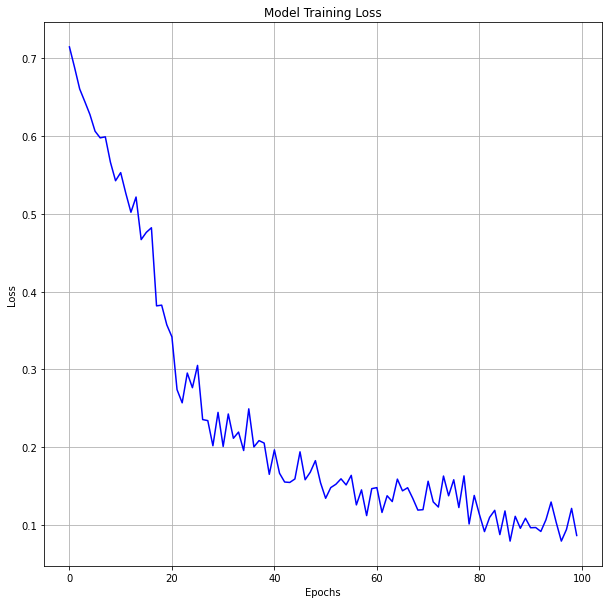

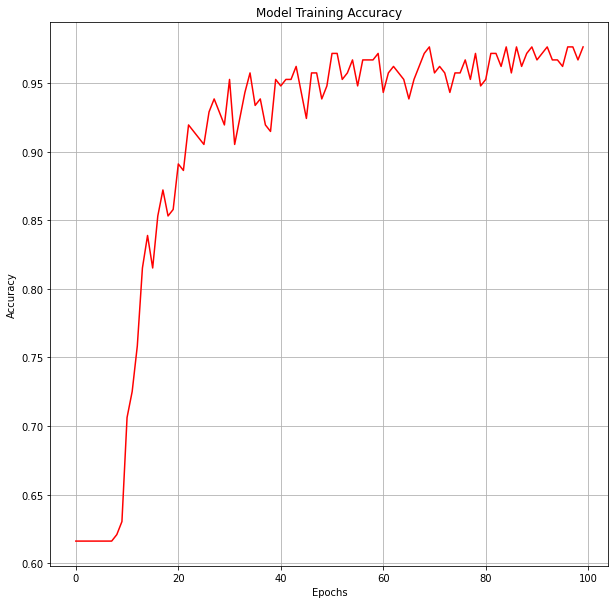

In [36]:
# Plotting Loss And Accuracy
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Training Loss")
plt.plot(history_df['epoch'], history_df['loss'], color = 'blue')
plt.grid()

plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Training Accuracy")
plt.plot(history_df['epoch'], history_df['accuracy'], color = 'red')
plt.grid()
plt.show()

In [37]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions[:10]

array([[3.4984056e-05],
       [9.9762177e-01],
       [8.3326173e-01],
       [9.9710089e-01],
       [3.2949448e-04],
       [8.1142783e-03],
       [9.9999899e-01],
       [9.9572420e-01],
       [2.0691723e-02],
       [9.6100760e-01]], dtype=float32)

In [38]:
# Testing Model On Test Data
testing = model.evaluate(test_data, test_labels)
testing

5/5 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.9000


[0.3540760576725006, 0.8999999761581421]

In [39]:
# Making Classification Report
from sklearn.metrics import classification_report
model_classification_report = classification_report(test_labels, predictions.round(), output_dict=True)

In [40]:
classification_report_df = pd.DataFrame(model_classification_report)
classification_report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.829787,0.935484,0.9,0.882636,0.901510
recall,0.866667,0.915789,0.9,0.891228,0.900000
f1-score,0.847826,0.925532,0.9,0.886679,0.900555
support,45.000000,95.000000,0.9,140.000000,140.000000


In [41]:
# Testing Loss And Testing Accuracy
print(f"Testing Loss: {testing[0]}")
print(f"Testing Accuracy: {testing[1]}")

Testing Loss: 0.3540760576725006
Testing Accuracy: 0.8999999761581421


In [42]:
# Saving Model
model.save('IonosphereModel.h5')

In [43]:
# Exporting Model In CSV File
from google.colab import files
df.to_csv('Ionosphere_Model.csv', index=False)
files.download('Ionosphere_Model.csv')
print("Your File Was Saved Successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your File Was Saved Successfully!
